In [82]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
samp = np.loadtxt('170170.txt', usecols=0)
MIN=samp.min();MAX=samp.max();MEAN=samp.mean();STD=samp.std();VAR=samp.var();SKEW=stats.skew(samp)
MIN,MAX,MEAN,STD,VAR,SKEW

(252.7,
 4581.0,
 2360.2540000000004,
 915.623239027931,
 838365.9158479997,
 -0.046615576549762956)

In [84]:
param = stats.norm.fit(samp) # distribution fitting

x = np.linspace(MIN,MAX,1000) # fitted distribution
pdf_fitted = stats.norm.pdf(x, *param)

In [85]:
param

(2360.2540000000004, 915.623239027931)

Power_divergenceResult(statistic=11.08702284692616, pvalue=0.13486791371999787)
12.919022062344425


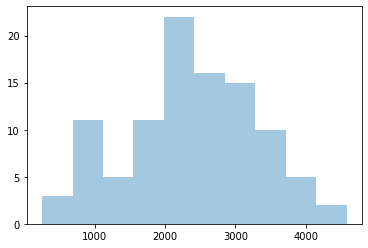

In [86]:
# chi-square
counts, edges, plot = plt.hist(samp,bins=10,alpha=0.4)

summ = 0
for i in range(0,10):
    upper_cdf = stats.norm.cdf(edges[i+1], *param)
    lower_cdf = stats.norm.cdf(edges[i], *param)
    summ += (counts[i]**2/(100*(upper_cdf-lower_cdf)))
chi_statistic = summ - 100

exp_counts = np.array([])
for i in range(0,10):
    upper_cdf = stats.norm.cdf(edges[i+1], *param)
    lower_cdf = stats.norm.cdf(edges[i], *param)
    exp_counts = np.append(exp_counts, 100 * (upper_cdf - lower_cdf))
print(stats.chisquare(counts,exp_counts,ddof=2))
print(chi_statistic)

In [87]:
stats.kstest(samp,'norm',args = (param[0],param[1]))

KstestResult(statistic=0.05362748300827436, pvalue=0.9359269906802518)

In [88]:
stats.anderson(samp, 'norm')

AndersonResult(statistic=0.24434031997670047, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

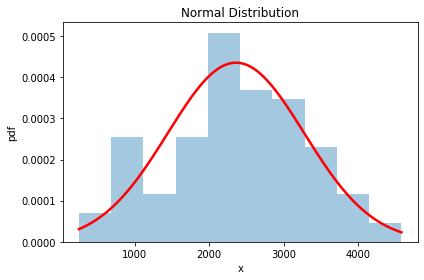

In [89]:
fig,axes = plt.subplots()

axes.plot(x,pdf_fitted,'r',lw=2.5)
axes.set_xlabel('x')
axes.set_ylabel('pdf')
axes.set_title('Normal Distribution')
fig.tight_layout()

plt.hist(samp,alpha=0.4,density=True)
fig.savefig("s5_norm.png",dpi=400)

In [90]:
k = 2
logLik = np.sum(stats.norm.logpdf(samp, *param)) 
aic = 2*k - 2*(logLik)
aic

1651.708700432462

In [91]:
dis = stats.norm.ppf(0.98,*param)
dis

4240.714229702795